In [1]:
# imports from lesson
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
# wrangled data
import wrangle


In [2]:
# acquired the data
df = wrangle.get_zillow17_data()
# prepare data (fill missing values, etc.)
df = wrangle.prep_zillow17(df)
# remove outliers except (fibs)
df = wrangle.remove_outliers_fibs(df, 3)
df

Let me get that for you...


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [3]:
# split data into train and test
train, validate, test = wrangle.split_dataframe(df)
print(train.shape)
print(validate.shape)
print(test.shape)

(1146719, 7)
(491451, 7)
(409543, 7)


1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [4]:
# utilize min-max scaling on train
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit_transform(train)
# apply min-max scaling on train, validate, test
train_scaled_mm = scaler.transform(train)
validate_scaled_mm = scaler.transform(validate)
test_scaled_mm = scaler.transform(test)

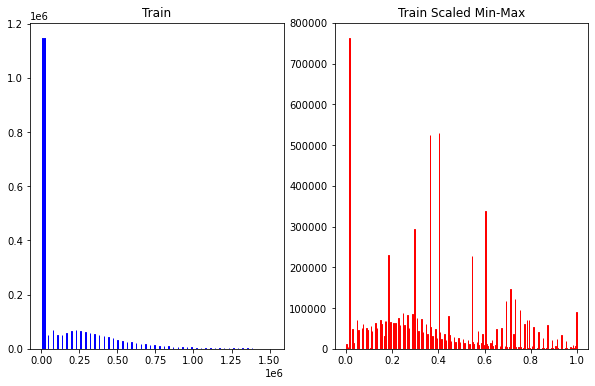

In [24]:
# visualize the data for train and train_scaled_mm
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(train, bins=50, ec='blue', label='train')
plt.title('Train')
plt.subplot(1, 2, 2)
plt.hist(train_scaled_mm, bins=50, ec='red', label='train_scaled')
plt.title('Train Scaled Min-Max')
plt.show()



In [6]:
# utilize standard scaling on train
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit_transform(train)
# apply standard scaling on train, validate, test
train_scaled_sd = scaler.transform(train)
validate_scaled_sd = scaler.transform(validate)
test_scaled_sd = scaler.transform(test)

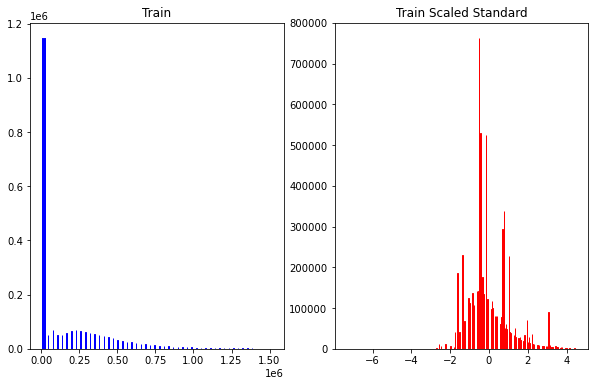

In [23]:
# visualize the data for train and train_scaled_sd
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(train, bins=50, ec='blue', label='train')
plt.title('Train')
plt.subplot(1, 2, 2)
plt.hist(train_scaled_sd, bins=50, ec='red', label='train_scaled')
plt.title('Train Scaled Standard')
plt.show()

In [8]:
# utilize Robust scaling on train
scaler = sklearn.preprocessing.RobustScaler()
scaler.fit_transform(train)
# apply Robust scaling on train, validate, test
train_scaled_rs = scaler.transform(train)
validate_scaled_rs = scaler.transform(validate)
test_scaled_rs = scaler.transform(test)

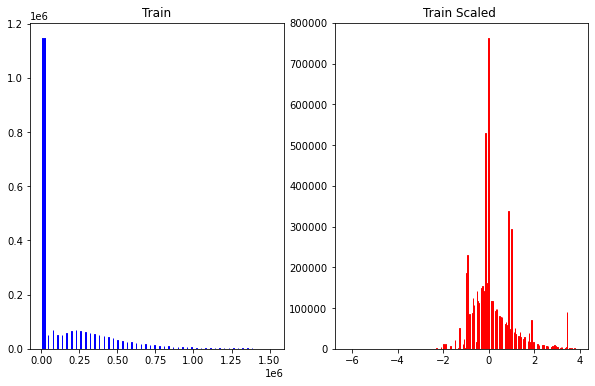

In [22]:
# visualize the data for train and train_scaled_rs
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(train, bins=50, ec='blue', label='train')
plt.title('Train')
plt.subplot(1, 2, 2)
plt.hist(train_scaled_rs, bins=50, ec='red', label='train_scaled')
plt.title('Train Scaled Robust')
plt.show()

2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [10]:
# apply inverse transform on train_scaled_mm, train_scaled_sd, train_scaled_rs
train_scaled_mm_inv = scaler.inverse_transform(train_scaled_mm)
train_scaled_sd_inv = scaler.inverse_transform(train_scaled_sd)
train_scaled_rs_inv = scaler.inverse_transform(train_scaled_rs)

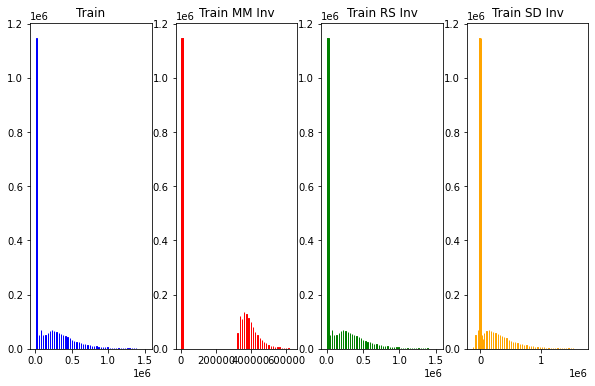

In [18]:
# visualize the data for train_scaled_mm_inv, train_scaled_sd_inv, train_scaled_rs_inv compared to train
plt.figure(figsize=(10, 6))
plt.subplot(1, 4, 1)
plt.hist(train, bins=50, ec='blue', label='train')
plt.title('Train')
plt.subplot(1, 4, 2)
plt.hist(train_scaled_mm_inv, bins=50, ec='red', label='train_scaled_mm_inv')
plt.title('Train MM Inv')
plt.subplot(1, 4, 3)
plt.hist(train_scaled_rs_inv, bins=50, ec='green', label='train_scaled_rs_inv')
plt.title('Train RS Inv')
plt.subplot(1, 4, 4)
plt.hist(train_scaled_sd_inv, bins=50, ec='orange', label='train_scaled_sd_inv')
plt.title('Train SD Inv')
plt.show()

3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [19]:
# utilize QuantileTransformer on df
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
scaler.fit_transform(train)
# apply QuantileTransformer on train, validate, test
train_scaled_qt = scaler.transform(train)
validate_scaled_qt = scaler.transform(validate)
test_scaled_qt = scaler.transform(test)

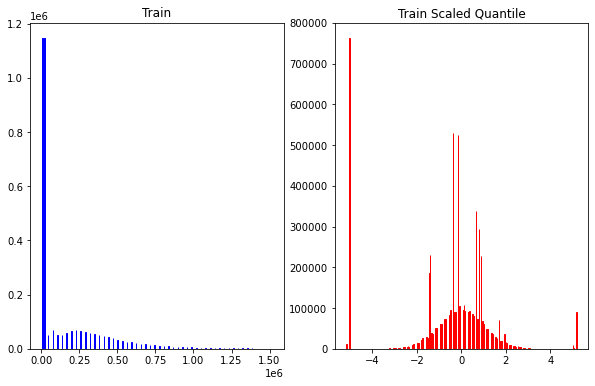

In [21]:
# visualize the data for train and train_scaled_qt
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(train, bins=50, ec='blue', label='train')
plt.title('Train')
plt.subplot(1, 2, 2)
plt.hist(train_scaled_qt, bins=50, ec='red', label='train_scaled')
plt.title('Train Scaled Quantile')
plt.show()

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!